**Group 10**:

Varinder Kaur (vkaur65@norquest.ca)

Satvir Kaur Mehra(smehra06@norquest.ca)

##Merging datsets



**Introduction and Problem Statement**

We merged two datasets—" Clients Data Dimension" and "Food Hampers Fact"—into a single dataset, "Merged_Food_Hampers_and_Clients.csv", to identify factors contributing to delays in the food hamper delivery process. By combining these datasets, we aimed to explore key variables that could influence the timely delivery of food hampers, using feature engineering and exploratory data analysis (EDA).

**Feature Engineering and EDA Process**


We performed feature engineering and EDA to uncover patterns and trends in the data. Key steps included:


*   **Time of Delivery**: Extracted the hour of delivery to explore if delays are related to specific times of the day.

*  **Communication Barriers**: Analyzed how communication barriers impact delays.

*   **Number of Dependents**: Investigated the correlation between the number of dependents in a household and delivery delays.

*   **Preferred Contact Method**: Studied how clients' contact preferences might influence delays.
*   **Organization Impact**: Examined if certain organizations experienced more delays.


*  **Urgent Goal & Delays**: Assessed the impact of urgent delivery goals on delays.


* **Distance between Client Address and Pickup Location**: Analyzed if longer distances contributed to more delays.


**Key Factors Contributing to Delays**

From our analysis, we identified several key factors that contribute to delays in the food hamper delivery process:



1.   **Time of Delivery**: Certain hours of the day show higher delay rates.

2.  **Communication Barriers**: Delays are more frequent with communication issues.

3.  **Number of Dependents**: More dependents may lead to higher delays.
4.   **Preferred Contact Method**: Communication preferences influence delay frequency.
5.   **Organization Impact**: Some organizations are linked to more delays.


6.   **Urgent Goal & Delays**: Urgent goals can lead to increased delays.


7.   **Distance between Client Address and Pickup Location**: Longer distances tend to result in more delays.










In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the clients datas
df_merged = pd.read_csv('Merged_Food_Hampers_and_Clients.csv')


In [ ]:
print(df_merged.info())
print(df_merged.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14296 entries, 0 to 14295
Data columns (total 54 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   agent_collect                     6313 non-null   object 
 1   appointment_contact               14296 non-null  object 
 2   appointment_participants          10437 non-null  object 
 3   appointment_type                  14296 non-null  object 
 4   client_collected                  6880 non-null   object 
 5   client_list                       14177 non-null  object 
 6   collect_scheduled_date            14293 non-null  object 
 7   collect_token                     14296 non-null  object 
 8   confirmed                         869 non-null    object 
 9   contact_method                    14296 non-null  object 
 10  datetime_from                     14295 non-null  object 
 11  datetime_to                       14292 non-null  object 
 12  deta

#Handle Duplicates and Missing Values

Check for Duplicates

In [ ]:
print(df_merged.duplicated().sum())  # Count duplicate rows
df_merged = df_merged.drop_duplicates()  # Remove duplicates


0


Check for Missing Values

In [ ]:
print(df_merged.isnull().sum().sort_values(ascending=False))  # View missing values per column


where                               14296
preferred_contact_method-old-old    14296
emergency_phone_number              14296
timezone                            14293
id_xano_y                           14288
primary_client_key                  13846
id_xano_x                           13437
confirmed                           13427
details                             12420
contact_frequency                   12135
date_reopened                       10533
status_update                       10268
agent_collect                        7983
pickup_date                          7983
hamper_confirmation_type             7983
client_collected                     7416
latest_language_code                 6813
latest_contact_method                6728
appointment_participants             3859
podio_created_on                     2670
sex                                  2588
preferred_contact_methods            2436
sex_new                              1417
address                           

In [ ]:
df_merged.to_csv("Merged_Food_Hampers_and_Clients.csv", index=False)



#Check for Missing Values

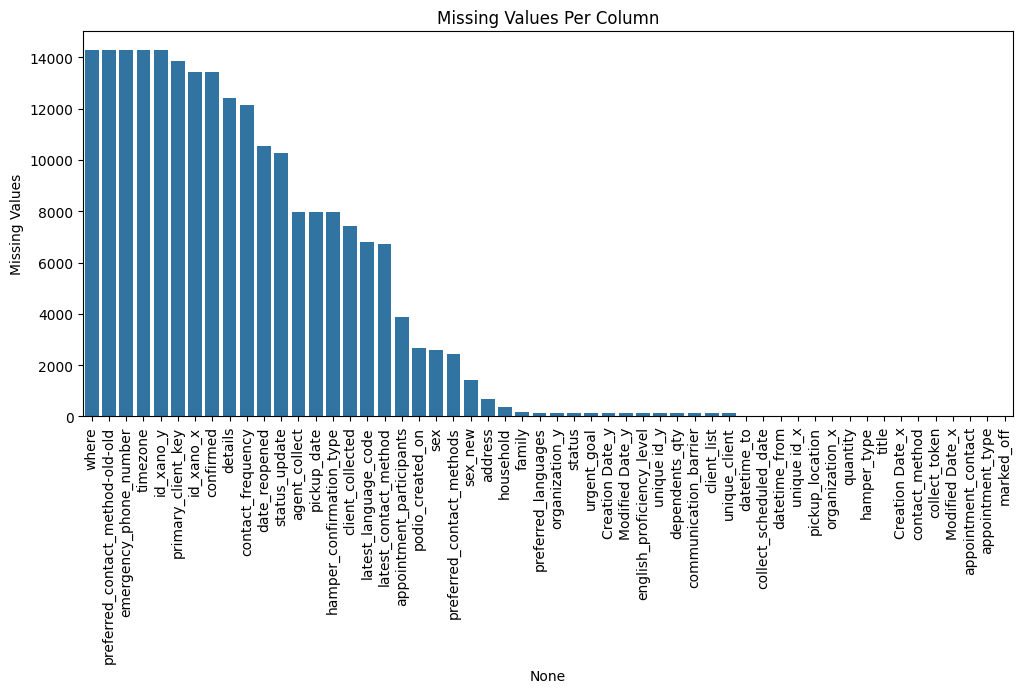

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count missing values per column
missing_values = df_merged.isnull().sum().sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(12, 5))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.ylabel("Missing Values")
plt.title("Missing Values Per Column")
plt.show()


Check for Duplicates

In [ ]:
# Count duplicate rows
print("Duplicate Rows:", df_merged.duplicated().sum())

# Drop duplicates if necessary
df_merged = df_merged.drop_duplicates()


Duplicate Rows: 0


#Define "Delayed" Deliveries
Create a 'Delayed' Column

Delayed
True     13427
False      869
Name: count, dtype: int64


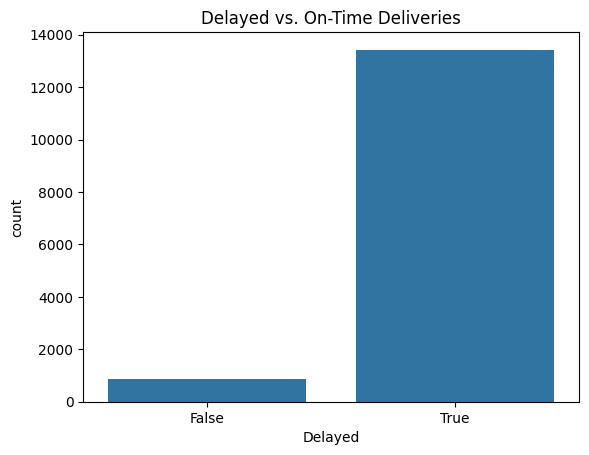

In [ ]:
# Convert dates to datetime format
df_merged["pickup_date"] = pd.to_datetime(df_merged["pickup_date"], errors="coerce")
df_merged["datetime_from"] = pd.to_datetime(df_merged["datetime_from"], errors="coerce")
df_merged["datetime_to"] = pd.to_datetime(df_merged["datetime_to"], errors="coerce")

# Define delay condition
df_merged["Delayed"] = (df_merged["datetime_to"] > df_merged["datetime_from"]) | (df_merged["confirmed"].isnull())

# Count delayed vs on-time deliveries
print(df_merged["Delayed"].value_counts())

# Plot delayed vs. on-time deliveries
sns.countplot(x=df_merged["Delayed"])
plt.title("Delayed vs. On-Time Deliveries")
plt.show()


#Identify Key Delay Factors

1. **Time of Delivery**

This extracts the hour of delivery from the timestamp and visualizes the trends in delivery delays based on the time of day. It aims to identify if certain hours contribute more to delays in the food hamper delivery process.

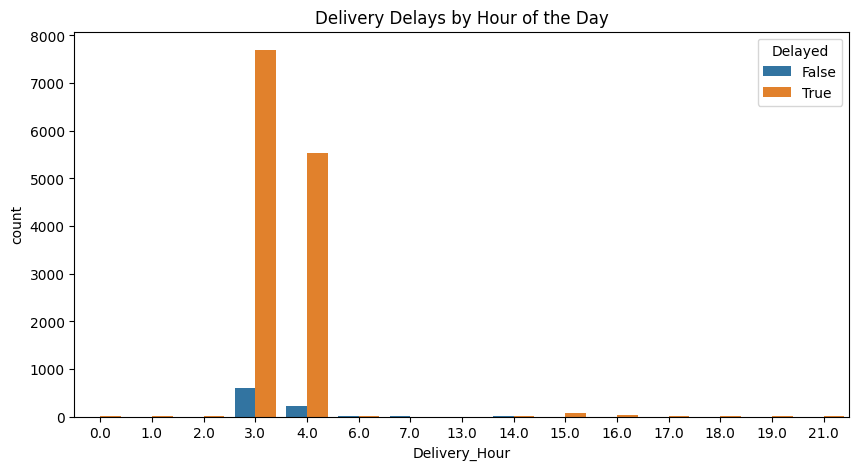

In [ ]:
# Extract hour of delivery
df_merged["Delivery_Hour"] = df_merged["datetime_from"].dt.hour

# Plot delay trends by hour
plt.figure(figsize=(10, 5))
sns.countplot(x="Delivery_Hour", hue="Delayed", data=df_merged)
plt.title("Delivery Delays by Hour of the Day")
plt.show()


2. **Communication Barriers**


This examines the relationship between communication barriers and delivery delays. It visualizes the frequency of delays based on the presence or absence of communication barriers, helping to assess how these barriers contribute to the delay in the food hamper delivery process.

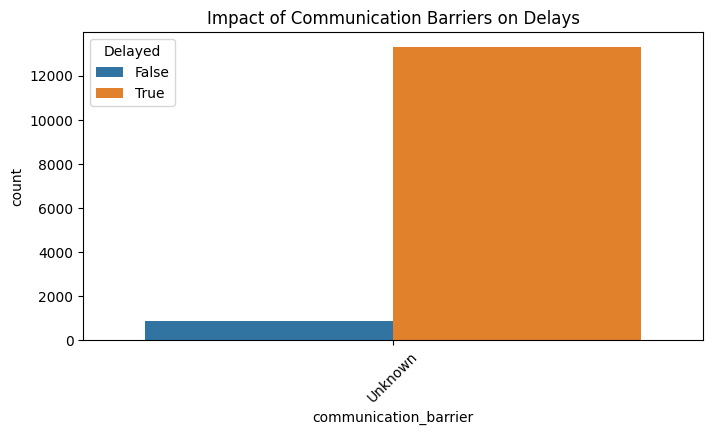

In [ ]:
# Check delay rate for communication barriers
plt.figure(figsize=(8, 4))
sns.countplot(x="communication_barrier", hue="Delayed", data=df_merged)
plt.title("Impact of Communication Barriers on Delays")
plt.xticks(rotation=45)
plt.show()


3.  **Number of Dependents**

This compares the number of dependents to the occurrence of delivery delays. A box plot is used to visualize any relationship between the quantity of dependents and whether delays were experienced, offering insights into how the number of dependents may influence delivery timeliness.

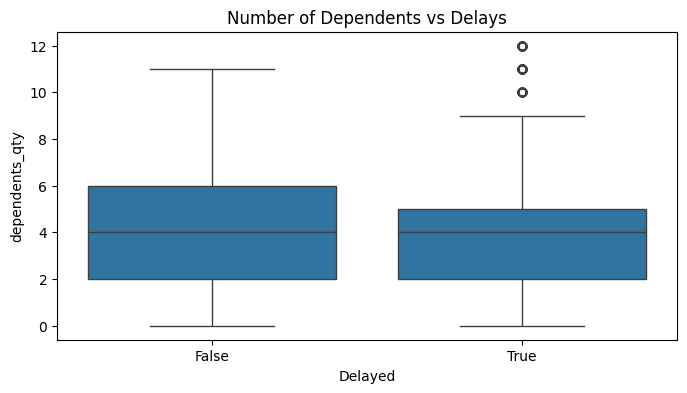

In [ ]:
# Compare dependents vs delays
plt.figure(figsize=(8, 4))
sns.boxplot(x="Delayed", y="dependents_qty", data=df_merged)
plt.title("Number of Dependents vs Delays")
plt.show()


4. **Preferred Contact Method**

This examines the impact of different preferred contact methods on delivery delays. By visualizing the frequency of delays across various contact methods, it aims to identify whether certain communication preferences contribute to a higher likelihood of delays in the food hamper delivery process.

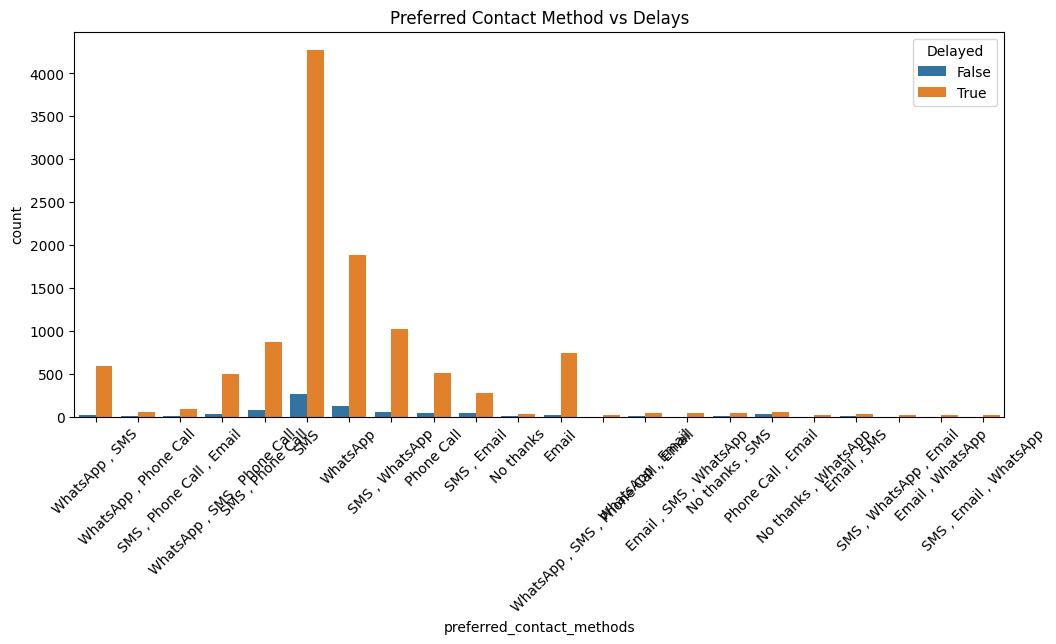

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(x="preferred_contact_methods", hue="Delayed", data=df_merged)
plt.title("Preferred Contact Method vs Delays")
plt.xticks(rotation=45)
plt.show()


5. **Organization Impact**

This analysis explores how different organizations are associated with delivery delays. By comparing delays across various organizations, the goal is to identify whether specific organizations experience more delays in the food hamper delivery process.

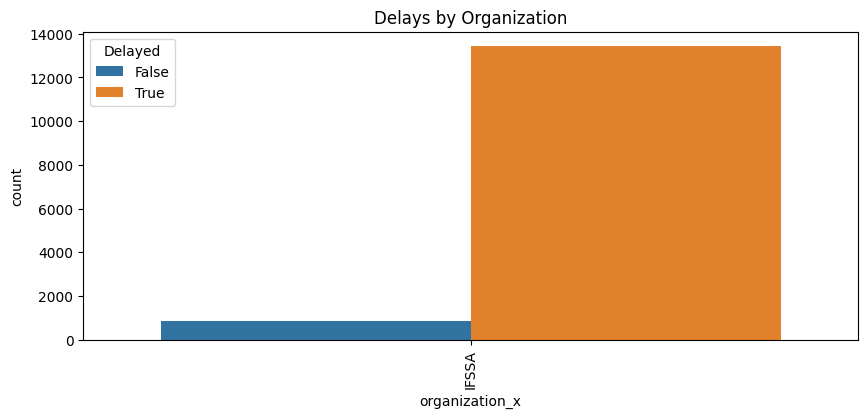

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x="organization_x", hue="Delayed", data=df_merged)
plt.title("Delays by Organization")
plt.xticks(rotation=90)
plt.show()


6.**Urgent Goal & Delays**

This analysis investigates whether urgent goals are linked to a higher incidence of delivery delays. By visualizing the relationship between urgent goals and delays, the goal is to determine if urgent delivery needs are associated with an increased likelihood of delays in the food hamper delivery process.

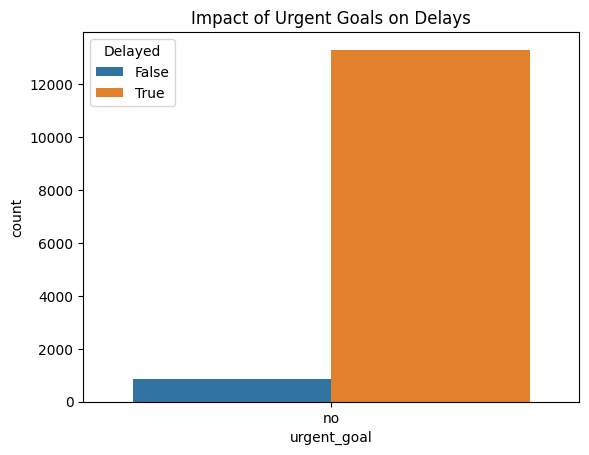

In [ ]:
sns.countplot(x="urgent_goal", hue="Delayed", data=df_merged)
plt.title("Impact of Urgent Goals on Delays")
plt.show()


7. Distance between client address and pickup location

In [ ]:
# install required libraries
!pip install geopy folium

**Geocode the client addresses**

In [ ]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="food_delivery_map")

# Function to geocode address and return latitude and longitude
def geocode_address(address):
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Example pickup location coordinates (replace these with actual coordinates for the pickup location)
# You can replace this with the actual pickup location from your dataset or hard-code if it's fixed
pickup_address = "10205 111 Street, Edmonton, AB, T5K 1K9"
pickup_lat, pickup_lon = geocode_address(pickup_address)  # Geocode pickup address

# Create a map centered on IFSSA location
edmonton_map = folium.Map(location=[53.540417, -113.497364], zoom_start=12)

# Loop through the dataframe and add markers for client addresses
for idx, row in df_merged.iterrows():
    client_address = row["address"]
    client_lat, client_lon = geocode_address(client_address)

    if client_lat and client_lon:
        # Add client location as a marker with popup showing delivery ID and delay
        folium.Marker([client_lat, client_lon],
                      popup=f"Delivery ID: {row['Delivery ID']}<br>Delay: {row['Delay']} hrs",
                      icon=folium.Icon(color="blue")).add_to(edmonton_map)

# Add a single marker for the pickup location (same for all deliveries)
if pickup_lat and pickup_lon:
    folium.Marker([pickup_lat, pickup_lon],
                  popup=f"Pickup Location<br>Delay: N/A",
                  icon=folium.Icon(color="red")).add_to(edmonton_map)

# Save the map as an HTML file
edmonton_map.save("edmonton_food_delivery_map_with_pickup_location.html")

print("Map saved as edmonton_food_delivery_map_with_pickup_location.html")


KeyError: 'Delivery ID'

**Explanation:**

**Geocoding the client addresses:** Each client address is geocoded using the geocode_address() function, and the coordinates are used to place markers for each delivery location.

**Static Pickup Location:** Since there's only one pickup location, I’ve set it to (53.540417, -113.497364), the address of IFSSA.

**Map Generation:** The map will show blue markers for the client delivery addresses and a red marker for the pickup location.

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="food_delivery_map")

# Caching dictionary to avoid repeated geocoding
cache = {}

# Function to geocode address and return latitude and longitude
def geocode_address(address):
    if address in cache:  # Check cache first
        return cache[address]

    try:
        if pd.isna(address) or address.strip() == "":
            return None, None  # Skip empty addresses

        time.sleep(1)  # Avoid rate-limiting
        location = geolocator.geocode(address, timeout=10)  # Increase timeout

        if location:
            cache[address] = (location.latitude, location.longitude)
            return location.latitude, location.longitude
    except Exception as e:
        print(f"Error geocoding {address}: {e}")

    cache[address] = (None, None)  # Store None for failed requests
    return None, None

# Fixed pickup location
pickup_lat, pickup_lon = 53.540417, -113.497364

# Check if dataset already has geocoded data
if 'latitude' in df_merged.columns and 'longitude' in df_merged.columns:
    df = df_merged.dropna(subset=['latitude', 'longitude'])  # Use existing geocoded data
else:
    # Apply geocoding to address column
    df_merged['latitude'], df_merged['longitude'] = zip(*df_merged['address'].apply(geocode_address))
    df_merged.to_csv("geocoded_addresses.csv", index=False)  # Save for future use

# Create a map centered on Edmonton
edmonton_map = folium.Map(location=[pickup_lat, pickup_lon], zoom_start=12)

# Loop through dataframe and add markers
for idx, row in df.iterrows():
    client_lat, client_lon = row.get('latitude'), row.get('longitude')

    if pd.notna(client_lat) and pd.notna(client_lon):
        # Calculate distance
        distance = geodesic((client_lat, client_lon), (pickup_lat, pickup_lon)).km

        # Add client location marker
        folium.Marker(
            [client_lat, client_lon],
            popup=f"Client Address: {row['address']}<br>Distance: {distance:.2f} km",
            icon=folium.Icon(color="blue")
        ).add_to(edmonton_map)

# Add a marker for the fixed pickup location
folium.Marker(
    [pickup_lat, pickup_lon],
    popup="Pickup Location<br>Fixed Location",
    icon=folium.Icon(color="red")
).add_to(edmonton_map)

# Save the map as an HTML file
edmonton_map.save("edmonton_food_delivery_distance_map.html")

print("Map saved as edmonton_food_delivery_distance_map.html")


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="food_delivery_map")

# Caching dictionary to avoid repeated geocoding
cache = {}

# Function to geocode address and return latitude and longitude
def geocode_address(address):
    if address in cache:  # Check cache first
        return cache[address]

    try:
        if pd.isna(address) or address.strip() == "":
            return None, None  # Skip empty addresses

        time.sleep(1)  # Avoid rate-limiting
        location = geolocator.geocode(address, timeout=10)  # Increase timeout

        if location:
            cache[address] = (location.latitude, location.longitude)
            return location.latitude, location.longitude
    except Exception as e:
        print(f"Error geocoding {address}: {e}")

    cache[address] = (None, None)  # Store None for failed requests
    return None, None

# Fixed pickup location
pickup_lat, pickup_lon = 53.540417, -113.497364

# Define distance thresholds (customize as needed)
moderate_delay_threshold = 10  # km
high_delay_threshold = 20  # km

# Check if dataset already has geocoded data
if 'latitude' in df_merged.columns and 'longitude' in df_merged.columns:
    df_merged = df_merged.dropna(subset=['latitude', 'longitude'])  # Use existing geocoded data
else:
    # Apply geocoding to address column
    df_merged['latitude'], df_merged['longitude'] = zip(*df_merged['address'].apply(geocode_address))
    df_merged.to_csv("geocoded_addresses.csv", index=False)  # Save for future use

# Create a map centered on Edmonton
edmonton_map = folium.Map(location=[pickup_lat, pickup_lon], zoom_start=12)

# Loop through dataframe and add markers
for idx, row in df.iterrows():
    client_lat, client_lon = row.get('latitude'), row.get('longitude')

    if pd.notna(client_lat) and pd.notna(client_lon):
        # Calculate distance
        distance = geodesic((client_lat, client_lon), (pickup_lat, pickup_lon)).km

        # Determine marker color based on distance
        if distance > high_delay_threshold:
            marker_color = "red"  # High delay
        elif distance > moderate_delay_threshold:
            marker_color = "orange"  # Moderate delay
        else:
            marker_color = "blue"  # Normal

        # Add client location marker
        folium.Marker(
            [client_lat, client_lon],
            popup=f"Client Address: {row['address']}<br>Distance: {distance:.2f} km",
            icon=folium.Icon(color=marker_color)
        ).add_to(edmonton_map)

# Add a marker for the fixed pickup location
folium.Marker(
    [pickup_lat, pickup_lon],
    popup="Pickup Location<br>Fixed Location",
    icon=folium.Icon(color="green")  # Green for pickup location
).add_to(edmonton_map)

# Save the map as an HTML file
edmonton_map.save("edmonton_food_delivery_distance_map.html")

print("Map saved as edmonton_food_delivery_distance_map.html")


Map saved as edmonton_food_delivery_distance_map.html


In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import time

# Initialize geolocator
geolocator = Nominatim(user_agent="food_delivery_map", timeout=10)

# Function to geocode address and return latitude and longitude
def geocode_address(address):
    try:
        location = geolocator.geocode(address)
        if location:
            return location.latitude, location.longitude
    except Exception as e:
        print(f"Error geocoding {address}: {e}")
    return None, None

# Load your dataset (Replace with actual file path)
# df = pd.read_csv('your_data.csv')
# first we will make a copy of dataset
df = df_merged.copy()
# Drop rows where 'address' is NaN
df = df.dropna(subset=['address']).reset_index(drop=True)

# Fixed pickup location
pickup_lat, pickup_lon = 53.540417, -113.497364

# Create a map centered on the pickup location
edmonton_map = folium.Map(location=[pickup_lat, pickup_lon], zoom_start=12)

# Threshold distance (km) beyond which locations are marked as 'far'
distance_threshold = 15

# Loop through the dataframe and add markers for client addresses
for idx, row in df.iterrows():
    address = row['address']

    client_lat, client_lon = geocode_address(address)

    if client_lat and client_lon:
        distance = geodesic((client_lat, client_lon), (pickup_lat, pickup_lon)).km

        # Choose marker color: Red for far locations, Blue for near
        marker_color = "red" if distance > distance_threshold else "blue"

        folium.Marker(
            [client_lat, client_lon],
            popup=f"Client Address: {address}<br>Distance: {distance:.2f} km",
            icon=folium.Icon(color=marker_color)
        ).add_to(edmonton_map)

        # Delay to prevent API timeout issues
        time.sleep(1)

# Add pickup location marker
folium.Marker(
    [pickup_lat, pickup_lon],
    popup="Pickup Location (Fixed)",
    icon=folium.Icon(color="green")
).add_to(edmonton_map)

# Save the map as an HTML file
edmonton_map.save("delays_map.html")

print("Map saved as delays_map.html")


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import time

# Initialize geolocator with a delay to prevent rate limiting
geolocator = Nominatim(user_agent="food_delivery_map", timeout=5)

# Function to geocode address and return latitude and longitude (with caching)
geocode_cache = {}

def geocode_address(address):
    if address in geocode_cache:  # Check if we already geocoded this address
        return geocode_cache[address]

    try:
        location = geolocator.geocode(address)
        if location:
            lat_lon = (location.latitude, location.longitude)
            geocode_cache[address] = lat_lon  # Cache the result
            time.sleep(1)  # Delay to prevent hitting API rate limits
            return lat_lon
    except:
        return None, None

# Load your dataset
# df = pd.read_csv('your_data.csv')  # Uncomment this and provide your actual file
df = df_merged.copy()
# Drop rows where 'address' is NaN
df = df.dropna(subset=['address']).reset_index(drop=True)

# Fixed pickup location
pickup_lat, pickup_lon = 53.540417, -113.497364
pickup_location = (pickup_lat, pickup_lon)

# Create a map centered on the pickup location
edmonton_map = folium.Map(location=[pickup_lat, pickup_lon], zoom_start=12)

# Loop through the dataframe and add markers for client addresses
for idx, row in df.iterrows():
    client_lat, client_lon = geocode_address(row['address'])

    if client_lat and client_lon:
        # Calculate distance from pickup location
        distance = geodesic((client_lat, client_lon), pickup_location).km

        # Choose marker color based on distance
        marker_color = "blue" if distance <= 10 else "orange"  # Highlight distant locations

        # Add client location as a marker with popup showing distance
        folium.Marker(
            [client_lat, client_lon],
            popup=f"Client Address: {row['address']}<br>Distance to Pickup: {distance:.2f} km",
            icon=folium.Icon(color=marker_color)
        ).add_to(edmonton_map)

# Add a marker for the fixed pickup location
folium.Marker(
    [pickup_lat, pickup_lon],
    popup="Pickup Location<br>Fixed Location",
    icon=folium.Icon(color="red")
).add_to(edmonton_map)

# Save the map as an HTML file
edmonton_map.save("edmonton_food_delivery_distance_map.html")

print("Map saved as edmonton_food_delivery_distance_map.html")


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
import pandas as pd
import folium
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
import time

# Initialize geolocator with a delay to prevent rate limiting
geolocator = Nominatim(user_agent="food_delivery_map", timeout=5)

# Function to geocode address and return latitude and longitude (with caching)
geocode_cache = {}

def geocode_address(address):
    if address in geocode_cache:  # Check if we already geocoded this address
        return geocode_cache[address]

    try:
        location = geolocator.geocode(address)
        if location:
            lat_lon = (location.latitude, location.longitude)
            geocode_cache[address] = lat_lon  # Cache the result
            time.sleep(1)  # Delay to prevent hitting API rate limits
            return lat_lon
    except:
        pass  # Silently ignore geocoding failures
    return None, None  # Return None if geocoding fails

# Load your dataset
# df = pd.read_csv('your_data.csv')  # Uncomment this and provide your actual file
df = df_merged.copy()

# Drop rows where 'address' is NaN
df = df.dropna(subset=['address']).reset_index(drop=True)

# Fixed pickup location
pickup_lat, pickup_lon = 53.540417, -113.497364
pickup_location = (pickup_lat, pickup_lon)

# Create a map centered on the pickup location
edmonton_map = folium.Map(location=[pickup_lat, pickup_lon], zoom_start=12)

# Loop through the dataframe and add markers for client addresses
for idx, row in df.iterrows():
    client_lat, client_lon = geocode_address(row['address'])

    if client_lat is not None and client_lon is not None:  # Only proceed if geocoding was successful
        # Calculate distance from pickup location
        distance = geodesic((client_lat, client_lon), pickup_location).km

        # Choose marker color based on distance
        marker_color = "blue" if distance <= 10 else "red"  # Highlight distant locations

        # Add client location as a marker with popup showing distance
        folium.Marker(
            [client_lat, client_lon],
            popup=f"Client Address: {row['address']}<br>Distance to Pickup: {distance:.2f} km",
            icon=folium.Icon(color=marker_color)
        ).add_to(edmonton_map)

# Add a marker for the fixed pickup location
folium.Marker(
    [pickup_lat, pickup_lon],
    popup="Pickup Location<br>Fixed Location",
    icon=folium.Icon(color="red")
).add_to(edmonton_map)

# Save the map as an HTML file
edmonton_map.save("edmonton_food_delivery_distance_map.html")

print("Map saved as edmonton_food_delivery_distance_map.html")


#Correlation Analysis

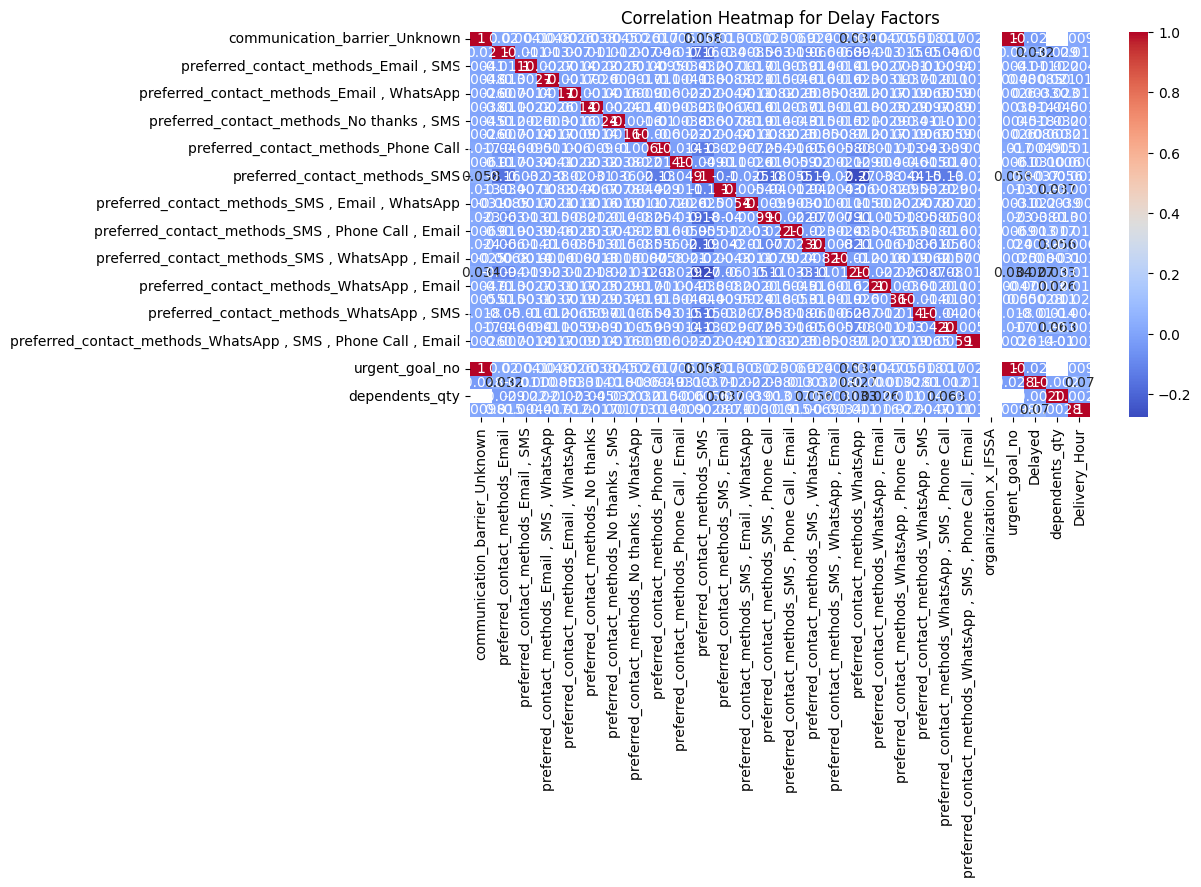

In [ ]:
# Convert categorical data into numerical for correlation
df_encoded = pd.get_dummies(df_merged[["communication_barrier", "preferred_contact_methods", "organization_x", "urgent_goal"]])

# Add numerical columns
df_encoded["Delayed"] = df_merged["Delayed"].astype(int)
df_encoded["dependents_qty"] = df_merged["dependents_qty"]
df_encoded["Delivery_Hour"] = df_merged["Delivery_Hour"]

# Compute correlation
plt.figure(figsize=(10, 5))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Delay Factors")
plt.show()


#Feature Engineering

Handle Missing Values

In [ ]:
# Fill missing values for categorical variables with "Unknown"
categorical_cols = ["communication_barrier", "preferred_contact_methods", "organization_x", "urgent_goal"]
df_merged[categorical_cols] = df_merged[categorical_cols].fillna("Unknown")

# Fill missing values for numerical variables with median
numerical_cols = ["dependents_qty", "Delivery_Hour"]
df_merged[numerical_cols] = df_merged[numerical_cols].fillna(df_merged[numerical_cols].median())

# Fill missing pickup dates with mode (most frequent value)
df_merged["pickup_date"].fillna(df_merged["pickup_date"].mode()[0], inplace=True)


<ipython-input-17-34876f5a378a>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged["pickup_date"].fillna(df_merged["pickup_date"].mode()[0], inplace=True)


Convert Dates to Useful Features

In [ ]:
# Extract time-based features
df_merged["pickup_day"] = df_merged["pickup_date"].dt.dayofweek  # Monday = 0, Sunday = 6
df_merged["pickup_month"] = df_merged["pickup_date"].dt.month
df_merged["delivery_hour"] = df_merged["datetime_from"].dt.hour
df_merged["is_weekend"] = df_merged["pickup_day"].apply(lambda x: 1 if x >= 5 else 0)


Encode Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical variables
encoder = LabelEncoder()
df_merged["communication_barrier"] = encoder.fit_transform(df_merged["communication_barrier"])
df_merged["preferred_contact_methods"] = encoder.fit_transform(df_merged["preferred_contact_methods"])
df_merged["organization_x"] = encoder.fit_transform(df_merged["organization_x"])
df_merged["urgent_goal"] = encoder.fit_transform(df_merged["urgent_goal"])


Drop Unnecessary Columns

In [ ]:
df_merged.drop(columns=["pickup_date", "datetime_from", "datetime_to", "id_xano_x", "id_xano_y", "unique id_x", "unique id_y"], inplace=True)


#Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define Features (X) and Target Variable (y)
X = df_merged.drop(columns=["Delayed"])  # Independent variables
y = df_merged["Delayed"]  # Target variable (1 = Delayed, 0 = On-Time)

# Split Data: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Before fitting the model, ensure all columns in X_train are numeric
for col in X_train.select_dtypes(include=['object']).columns:
    try:
        # Attempt to convert to numeric, errors will be coerced to NaN
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')
        # Fill NaN values (if any) with a suitable strategy
        X_train[col].fillna(X_train[col].median(), inplace=True)
    except ValueError:
        # If conversion to numeric fails, apply Label Encoding
        from sklearn.preprocessing import LabelEncoder
        encoder = LabelEncoder()
        X_train[col] = encoder.fit_transform(X_train[col])

# Perform the same conversions on the X_test dataset
for col in X_test.select_dtypes(include=['object']).columns:
    try:
        X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
        X_test[col].fillna(X_test[col].median(), inplace=True)
    except ValueError:
        X_test[col] = encoder.transform(X_test[col]) # Use the same encoder


## Train Machine Learning Models

#Train a Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
# Now we can fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predictions
y_pred_dt = dt_model.predict(X_test)



# Evaluate performance
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7916290274013851
              precision    recall  f1-score   support

       False       0.22      0.10      0.14       551
        True       0.84      0.93      0.88      2770

    accuracy                           0.79      3321
   macro avg       0.53      0.52      0.51      3321
weighted avg       0.74      0.79      0.76      3321



#Train a Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8154170430593195
              precision    recall  f1-score   support

       False       0.20      0.04      0.06       551
        True       0.84      0.97      0.90      2770

    accuracy                           0.82      3321
   macro avg       0.52      0.50      0.48      3321
weighted avg       0.73      0.82      0.76      3321



#Feature Importance Analysis

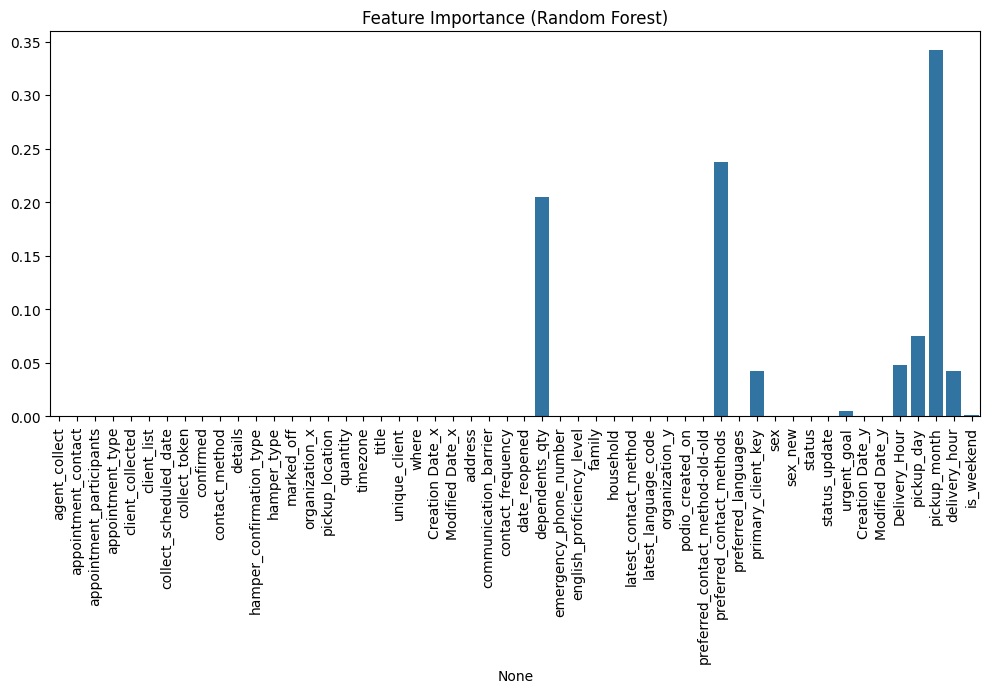

In [ ]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importances
plt.figure(figsize=(12, 5))
sns.barplot(x=feature_names, y=importances)
plt.xticks(rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()


#Model Selection & Optimization


##Hyperparameter Tuning for Random Forest

Define Hyperparameter Search Space

We will tune:

n_estimators (number of trees)


max_depth (maximum depth of trees)


min_samples_split (minimum samples required to split a node)


min_samples_leaf (minimum samples required in a leaf node)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    rf, param_distributions=param_grid,
    n_iter=10, cv=5, scoring='accuracy',
    n_jobs=-1, verbose=2, random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters:", random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 20}


## Train the Optimized Model
Once we get the best hyperparameters, we train the final model.

In [ ]:
# Train Random Forest with best hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=random_search.best_params_["n_estimators"],
    max_depth=random_search.best_params_["max_depth"],
    min_samples_split=random_search.best_params_["min_samples_split"],
    min_samples_leaf=random_search.best_params_["min_samples_leaf"],
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predictions
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate Performance
from sklearn.metrics import accuracy_score, classification_report

print("Optimized Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Optimized Random Forest Accuracy: 0.8367961457392352
              precision    recall  f1-score   support

       False       1.00      0.02      0.03       551
        True       0.84      1.00      0.91      2770

    accuracy                           0.84      3321
   macro avg       0.92      0.51      0.47      3321
weighted avg       0.86      0.84      0.77      3321



## Feature Importance Analysis
To understand which factors contribute the most to delivery delays:

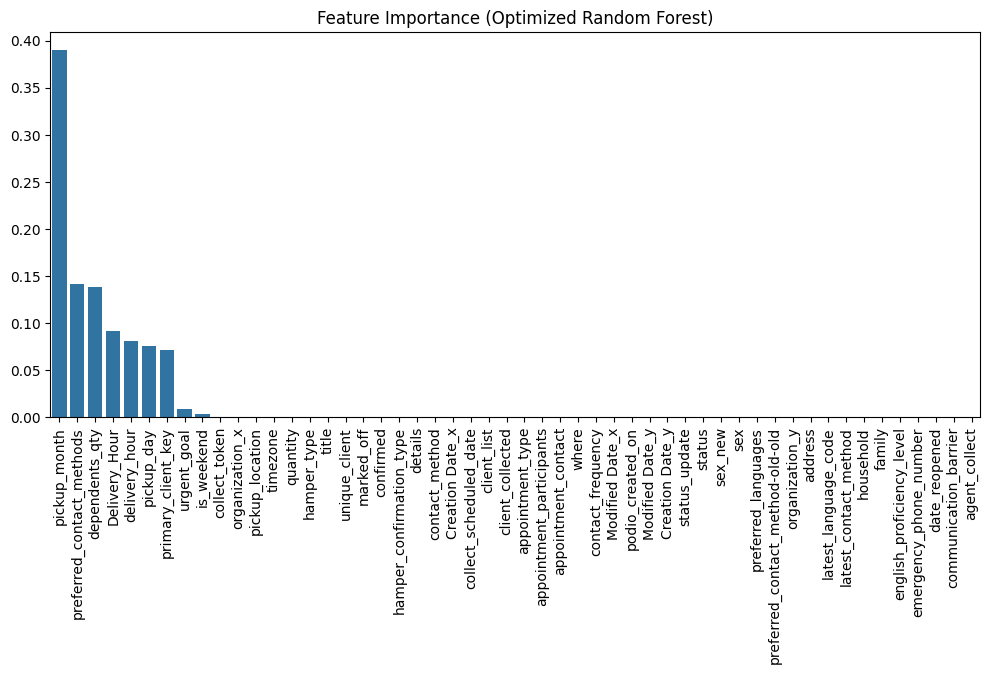

In [ ]:
importances = best_rf.feature_importances_
feature_names = X.columns

# Sort features by importance
sorted_indices = importances.argsort()[::-1]

# Plot feature importance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x=[feature_names[i] for i in sorted_indices], y=importances[sorted_indices])
plt.xticks(rotation=90)
plt.title("Feature Importance (Optimized Random Forest)")
plt.show()


## Save & Deploy the Model

In [ ]:
import joblib

# Save model
joblib.dump(best_rf, "food_hamper_delay_model.pkl")

# Load model (for future use)
loaded_model = joblib.load("food_hamper_delay_model.pkl")

# Predict with the loaded model
y_pred_loaded = loaded_model.predict(X_test)
print("Loaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))


Loaded Model Accuracy: 0.8367961457392352
